In [124]:
# File Handling
import h5py

# Signal processing
import numpy as np
import scipy.io as io
import pandas as pd
import scipy.signal 
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns


path_dict = {'DATA.CORE': '/Users/maryam/Desktop/'}
Dataset = pd.read_csv('{}temp_datalab_records_job_listings.csv'.format(path_dict['DATA.CORE']),nrows = 100000)
Dataset.head(n=5)
# Start = Dataset["StartDate"]

Dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
dataset_id            100000 non-null int64
listing_id            100000 non-null object
domain                100000 non-null object
as_of_date            100000 non-null object
title                 99999 non-null object
url                   100000 non-null object
brand                 22517 non-null object
category              23619 non-null object
locality              77206 non-null object
region                72504 non-null object
country               78193 non-null object
number_of_openings    775 non-null float64
date_added            100000 non-null object
date_updated          100000 non-null object
posted_date           41966 non-null object
location_string       9086 non-null object
description           0 non-null float64
entity_id             0 non-null float64
city_lat              0 non-null float64
city_lng              0 non-null float64
cusip             

In [33]:
def IsValidEntry(dataF,Name):            
        Country = dataF["country"].str.find(Name)
        return Country>=0

In [100]:
Countries =Dataset["country"].dropna().unique().tolist()
# print(np.size(Countries))


Country_Rep = np.zeros(np.size(Countries))

a = 0
for index in Countries:    
#     print([index])
    Ind = IsValidEntry(Dataset,index)
    Country_Rep[a]=sum(Ind)
    a = a + 1

    
    
    

# Visualize total amount of posted jobs within each country : Shows US, China, Canada, 

Top countries with large number of available jobs=  ['USA' 'CHN' 'CAN' 'GBR' 'IND']


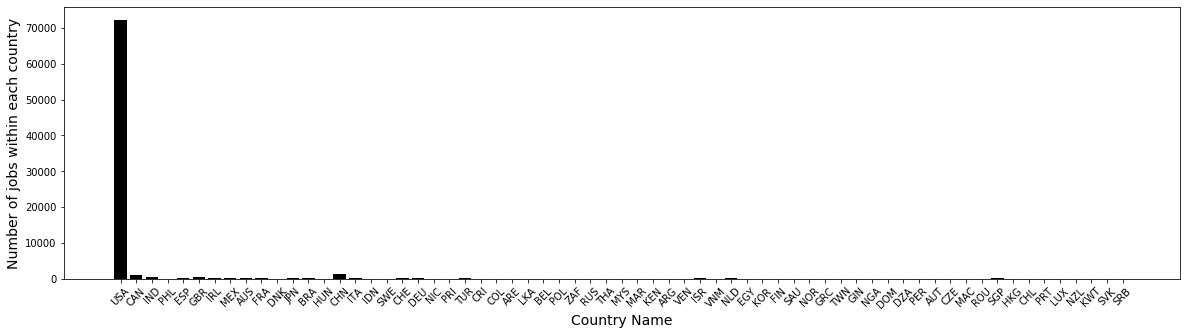

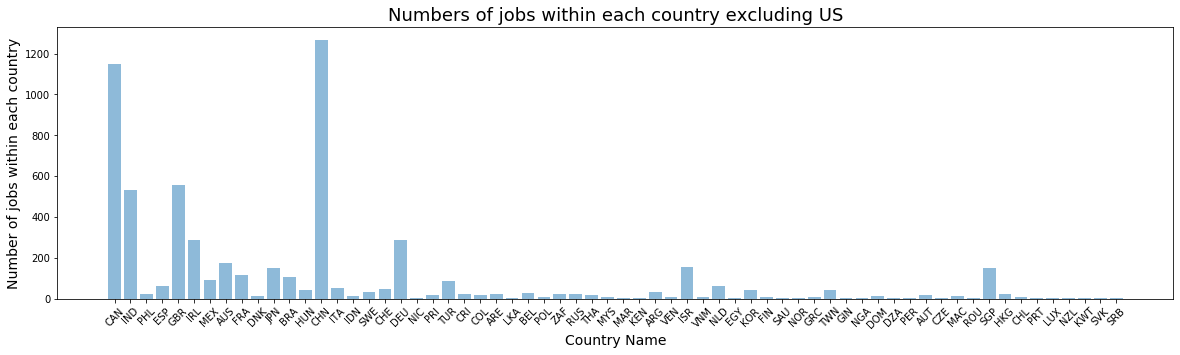

In [115]:
plt.figure(figsize=(20,5))

ax = plt.axes()
x_pos = [i for i, _ in enumerate(Country_Rep)]
ax.set_ylabel('Number of jobs within each country',fontsize = 14)
ax.set_xlabel('Country Name',fontsize = 14)
plt.bar(x_pos,Country_Rep, color = 'k')
locs, labels = plt.xticks() 
plt.xticks(x_pos)
ax.set_xticklabels (Countries,fontsize = 10)
plt.xticks(rotation=45)


plt.figure(figsize=(20,5))

ax = plt.axes()
x_pos = np.arange(1,len(Country_Rep))
# print(x_pos)
ax.set_ylabel('Number of jobs within each country',fontsize=14)
ax.set_xlabel('Country Name',fontsize=14)
ax.set_title('Numbers of jobs within each country excluding US',fontsize = 18)
plt.bar(x_pos,Country_Rep[1:len(Country_Rep)], alpha=0.5)
locs, labels = plt.xticks() 
plt.xticks(x_pos)
ax.set_xticklabels(Countries[1:len(Country_Rep) ],fontsize = 10)
plt.xticks(rotation=45)

CountryArr =  np.asarray(Country_Rep)
Sorted_Cont = CountryArr.argsort()[::-1][:5]

CountryNameArr = np.asarray(Countries)

print("Top countries with large number of available jobs= ", CountryNameArr[Sorted_Cont])


# Visualize during which year there are more job posting (working on as_of_date)

# which job categories are the most common ones 

In [126]:
def IsValidEntryTit(dataF,Name):            
        Jobs= dataF["category"].str.find(Name)
        return Jobs>=0
    

In [139]:
Categories =Dataset["category"].dropna().unique().tolist()
# print(np.size(Countries))


Category_Rep = np.zeros(np.size(Titles ))

a = 0
for index in Titles:    
#     print([index])
    Ind = IsValidEntryTit(Dataset,index)
    Category_Rep[a]=sum(Ind)
    a = a + 1




(581,)
Top 10 demanding job categories out of 581  =  ['Engineering' 'Customer Service' 'Management' 'Retail' 'Operations'
 'Technology' 'Support' 'Hardware Engineering' 'Software Engineering']


In [149]:
print(Category_Rep.shape)

CategoryArr =  np.asarray(Category_Rep)
Sorted_Cat = CategoryArr.argsort()[::-1][:50]

CatNameArr = np.asarray(Categories )

print("Top 10 demanding job categories out of 581  = ", CatNameArr[Sorted_Cat[1:10]])



(581,)
Top 10 demanding job categories out of 581  =  ['Engineering' 'Customer Service' 'Management' 'Retail' 'Operations'
 'Technology' 'Support' 'Hardware Engineering' 'Software Engineering']


# Visualize job categories  

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

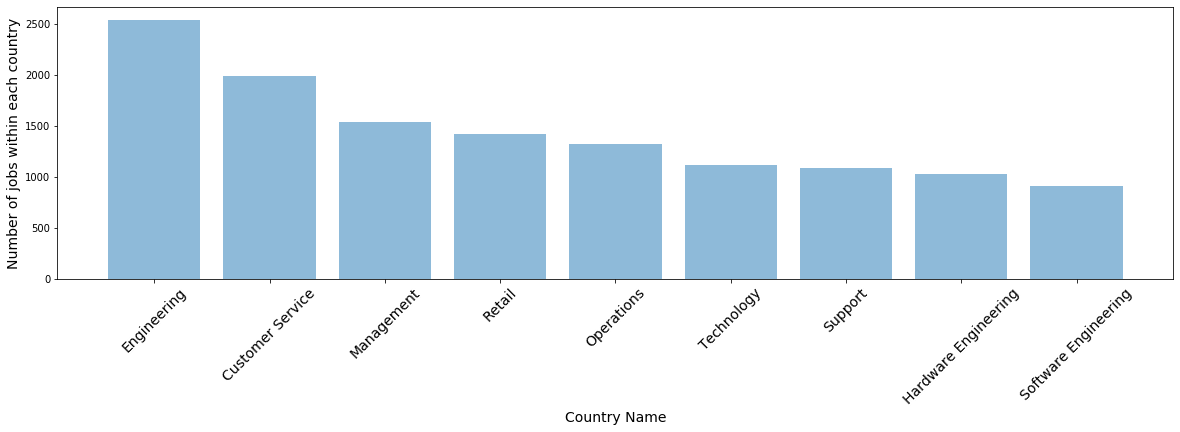

In [160]:


plt.figure(figsize=(20,5))

ax = plt.axes()
x_pos = [i for i, _ in enumerate(np.arange(0,9))]
ax.set_ylabel('Number of jobs within each country',fontsize = 14)
ax.set_xlabel('Country Name',fontsize = 14)
plt.bar(x_pos,CategoryArr[Sorted_Cat[1:10]], alpha = 0.5)
locs, labels = plt.xticks() 
plt.xticks(x_pos)
Names = CatNameArr[Sorted_Cat[1:10]]
ax.set_xticklabels (Names,fontsize = 14)
plt.xticks(rotation=45)
